In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import plotly.graph_objects as go

## Google Stock Price Analysis for Past 5 Years

In [54]:
# Load the data and print
data = pd.read_csv("GOOGL.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-02,48.782501,48.887001,48.097500,48.373501,48.373501,30782000
1,2017-10-03,48.377998,48.622002,48.135502,48.604000,48.604000,21666000
2,2017-10-04,48.588001,48.720001,48.280499,48.339001,48.339001,21156000
3,2017-10-05,48.639500,49.325500,48.513500,49.259499,49.259499,35618000
4,2017-10-06,49.000000,49.713001,48.925499,49.681999,49.681999,31060000


Graph Data

In [42]:

figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis for Past 5 Years", xaxis_rangeslider_visible=False)
figure.show()

## Google Stock Price Analysis for the Past Year

In [61]:
# Load the data and print
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-30,134.324997,135.589996,133.000000,133.265503,133.265503,35294000.0
1,2021-10-01,133.554504,137.070999,133.377502,136.462494,136.462494,28388000.0
2,2021-10-04,135.699493,135.699997,131.166504,133.764999,133.764999,31530000.0
3,2021-10-05,134.000000,137.362000,134.000000,136.177002,136.177002,24126000.0
4,2021-10-06,134.625504,137.852005,134.486496,137.354004,137.354004,19764000.0


Graph Data

In [44]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis The Past Year", xaxis_rangeslider_visible=False)
figure.show()

## Applyling Linear Regresssion

NA's

In [62]:
##Check for NA
data.isna().sum()
## Drop NA
data = data.dropna()

Time

In [63]:
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

Split the data into a training and test set of 80% and 20% to improve accuracy of prediction

In [64]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [65]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Date']])
train_y = np.asanyarray(train[['Close']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.17211406]]
Intercept:  [149.65421476]


Plot the linear regression

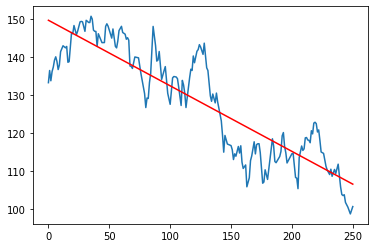

In [66]:
plt.plot(train.Date, train.Close)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')


Evaluating the data

In [67]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Date']])
test_y = np.asanyarray(test[['Close']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5.17
Residual sum of squares (MSE): 40.82
R2-score: 0.83
